# 🚗 Predição do Valor de Revenda de Veículos Elétricos

### Projeto de Data Science aplicado a mercado automotivo

**Objetivo**
Desenvolver um modelo capaz de estimar o valor de revenda de veículos elétricos com base em características técnicas, operacionais e de uso.

**Perguntas de negócio**
- O que mais impacta o valor de revenda?
- Como o uso do veículo influencia a depreciação?
- Quais características aumentam a retenção de valor?
- É possível prever o preço futuro com confiabilidade?

**Etapas do projeto**
1. Exploração estatística  
2. Tendências de mercado  
3. Modelagem preditiva  
4. Interpretação e insights estratégicos  



## Contexto

O crescimento do mercado de veículos elétricos trouxe novos desafios relacionados à precificação, depreciação e valor residual desses ativos.

Empresas do setor precisam entender como características técnicas e padrões de uso impactam o valor de revenda, permitindo decisões mais assertivas em:

- precificação
- gestão de frotas
- seguros
- planejamento de produto


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("electric_vehicles.csv")
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [7]:
colunas_pt = {
"Vehicle_ID":"ID_Veiculo",
"Make":"Marca",
"Model":"Modelo",
"Year":"Ano",
"Region":"Regiao",
"Vehicle_Type":"Tipo_Veiculo",
"Battery_Capacity_kWh":"Capacidade_Bateria_kWh",
"Battery_Health_%":"Saude_Bateria_%",
"Range_km":"Autonomia_km",
"Charging_Power_kW":"Potencia_Carregamento_kW",
"Charging_Time_hr":"Tempo_Carregamento_h",
"Charge_Cycles":"Ciclos_Carga",
"Energy_Consumption_kWh_per_100km":"Consumo_kWh_100km",
"Mileage_km":"Quilometragem_km",
"Avg_Speed_kmh":"Velocidade_Media_kmh",
"Max_Speed_kmh":"Velocidade_Max_kmh",
"Acceleration_0_100_kmh_sec":"Aceleracao_0_100s",
"Temperature_C":"Temperatura_C",
"Usage_Type":"Tipo_Uso",
"CO2_Saved_tons":"CO2_Economizado_t",
"Maintenance_Cost_USD":"Custo_Manutencao_USD",
"Insurance_Cost_USD":"Custo_Seguro_USD",
"Electricity_Cost_USD_per_kWh":"Custo_Energia_USD_kWh",
"Monthly_Charging_Cost_USD":"Custo_Carregamento_Mensal_USD",
"Resale_Value_USD":"Valor_Revenda_USD"
}

df_pt = df.rename(columns=colunas_pt)


In [11]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_do_veículo                   3000 non-null   int64  
 1   Fazer                           3000 non-null   object 
 2   Modelo                          3000 non-null   object 
 3   Ano                             3000 non-null   int64  
 4   Região                          3000 non-null   object 
 5   Tipo_veículo                    3000 non-null   object 
 6   Bateria_Capacidade_kWh          3000 non-null   float64
 7   Bateria_Saúde_%                 3000 non-null   float64
 8   Alcance_km                      3000 non-null   int64  
 9   Carregamento_Potência_kW        3000 non-null   float64
 10  Carregamento_Tempo_hora         3000 non-null   float64
 11  Carga_Ciclos                    3000 non-null   int64  
 12  Energia_Consumo_kWh_por_100km   30

ID_do_veículo                     0
Fazer                             0
Modelo                            0
Ano                               0
Região                            0
Tipo_veículo                      0
Bateria_Capacidade_kWh            0
Bateria_Saúde_%                   0
Alcance_km                        0
Carregamento_Potência_kW          0
Carregamento_Tempo_hora           0
Carga_Ciclos                      0
Energia_Consumo_kWh_por_100km     0
Quilometragem_km                  0
Média_Velocidade_kmh              0
Velocidade_máx_kmh                0
Aceleração_0_100_kmh_seg          0
Temperatura_C                     0
Tipo_de uso                       0
CO2_economias_toneladas           0
Manutenção_Custo_USD              0
Seguro_Custo_USD                  0
Eletricidade_Custo_USD_per_kWh    0
Mensal_Cobrança_Custo_USD         0
Revenda_Valor_USD                 0
dtype: int64

In [13]:
df = df.drop_duplicates()

df_model = df.drop(columns=["ID_do_veículo"])

# tratar valores faltantes numéricos
for col in df_model.select_dtypes(include=np.number):
    df_model[col] = df_model[col].fillna(df_model[col].median())

# tratar categóricos
for col in df_model.select_dtypes(include='object'):
    df_model[col] = df_model[col].fillna(df_model[col].mode()[0])


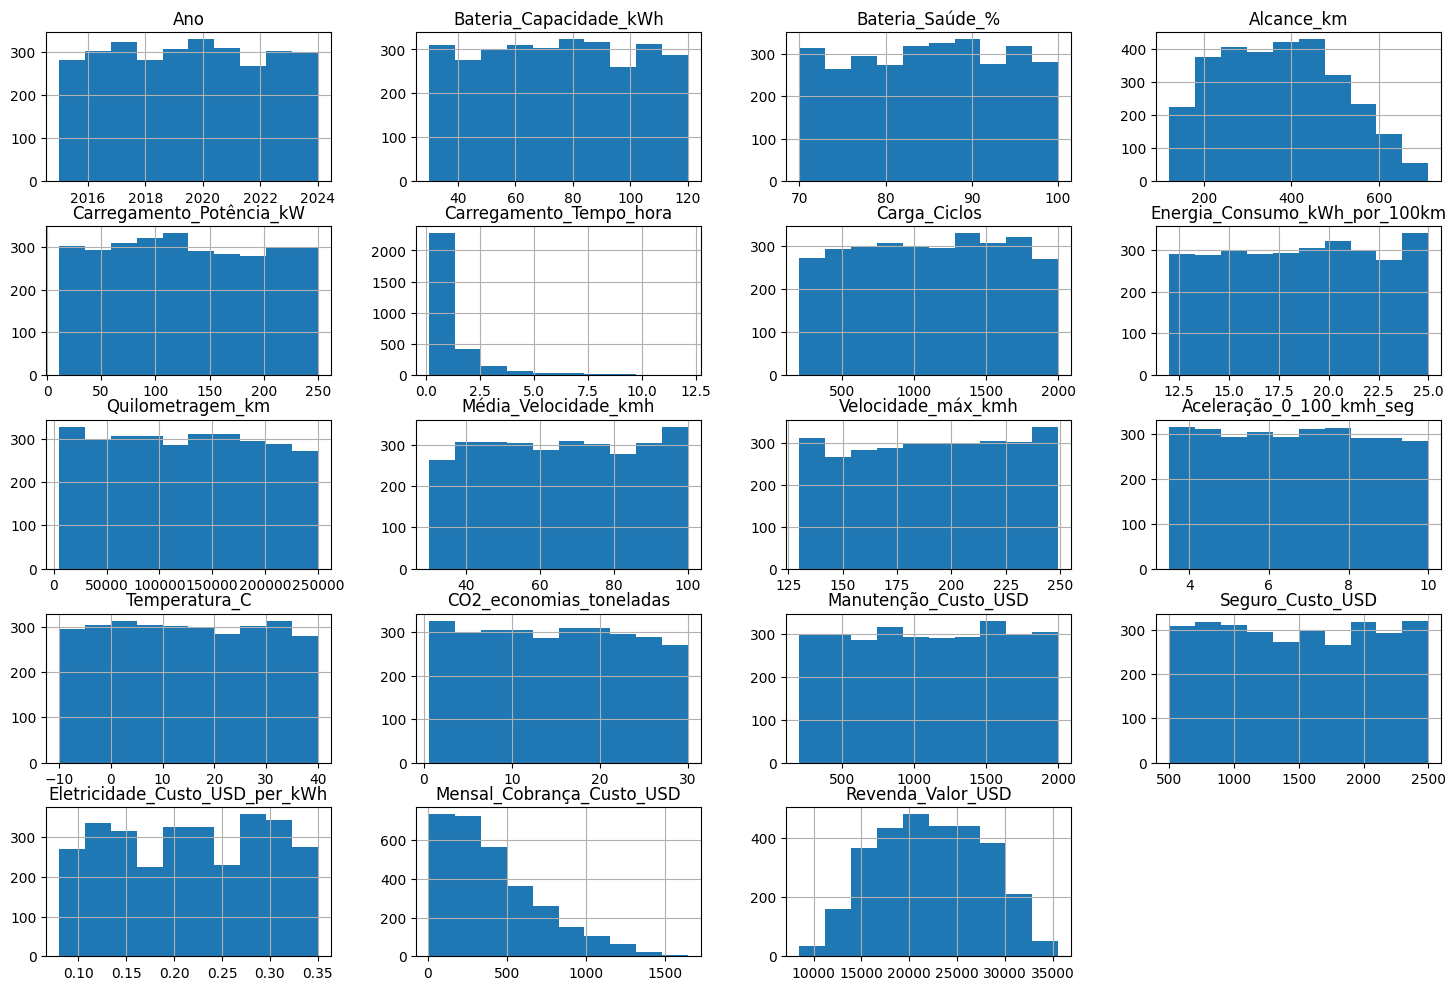

In [14]:
df_model.hist(figsize=(18,12))
plt.show()


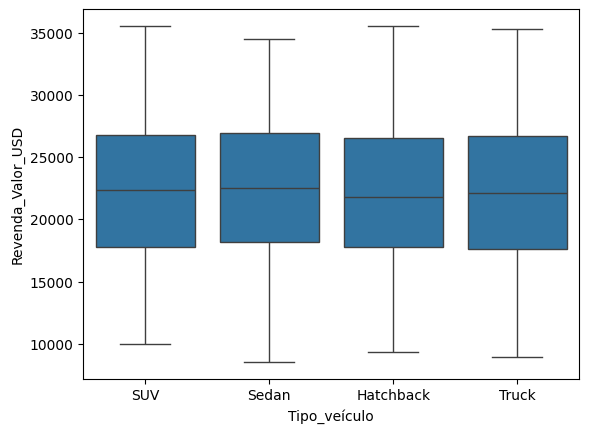

In [15]:
sns.boxplot(data=df_model, x="Tipo_veículo", y="Revenda_Valor_USD")
plt.show()


stats.f_oneway(
    df_model[df_model["Tipo_veículo"]=="Sedan"]["Revenda_Valor_USD"],
    df_model[df_model["Tipo_veículo"]=="SUV"]["Revenda_Valor_USD"],
    df_model[df_model["Tipo_veículo"]=="Truck"]["Revenda_Valor_USD"]
)


In [17]:
# Saúde da bateria vs tipo de veículo
stats.f_oneway(
    df_model[df_model["Tipo_veículo"]=="Sedan"]["Bateria_Saúde_%"],
    df_model[df_model["Tipo_veículo"]=="SUV"]["Bateria_Saúde_%"],
    df_model[df_model["Tipo_veículo"]=="Truck"]["Bateria_Saúde_%"]
)


F_onewayResult(statistic=np.float64(0.8650071742923798), pvalue=np.float64(0.42119013887260115))

In [19]:
stats.pearsonr(df_model["Bateria_Saúde_%"], df_model["Quilometragem_km"])


PearsonRResult(statistic=np.float64(0.02885496858459314), pvalue=np.float64(0.1140789148210117))

In [20]:
stats.pearsonr(df_model["Bateria_Saúde_%"], df_model["Carga_Ciclos"])


PearsonRResult(statistic=np.float64(-0.017264067741648143), pvalue=np.float64(0.34452191618857947))

In [21]:
stats.pearsonr(df_model["Bateria_Saúde_%"], df_model["Revenda_Valor_USD"])


PearsonRResult(statistic=np.float64(-0.012456958736086234), pvalue=np.float64(0.4952150200784253))

In [22]:
stats.pearsonr(df_model["Quilometragem_km"], df_model["Revenda_Valor_USD"])


PearsonRResult(statistic=np.float64(-0.018106249673453718), pvalue=np.float64(0.32149610622114905))

In [23]:
stats.pearsonr(df_model["Ano"], df_model["Revenda_Valor_USD"])


PearsonRResult(statistic=np.float64(0.2449753773467182), pvalue=np.float64(3.032639793361537e-42))

In [24]:
stats.pearsonr(df_model["Alcance_km"], df_model["Revenda_Valor_USD"])


PearsonRResult(statistic=np.float64(0.8611991647646802), pvalue=np.float64(0.0))

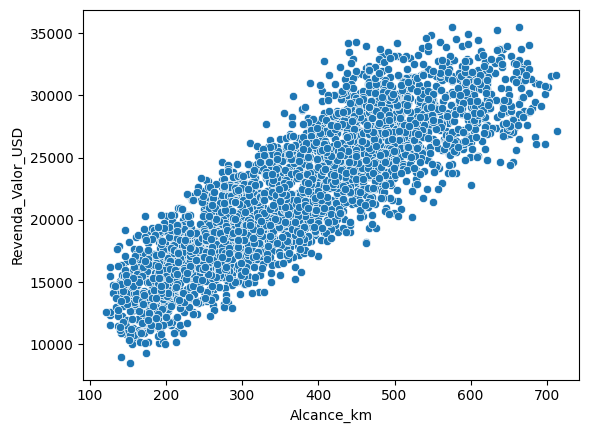

In [25]:
sns.scatterplot(
    data=df_model,
    x="Alcance_km",
    y="Revenda_Valor_USD"
)
plt.show()


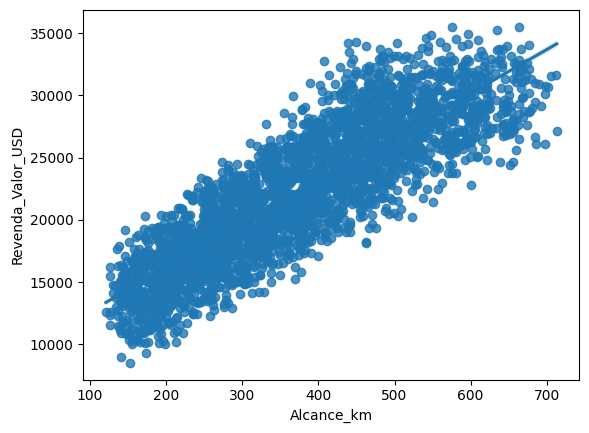

In [26]:
sns.regplot(
    data=df_model,
    x="Alcance_km",
    y="Revenda_Valor_USD"
)
plt.show()


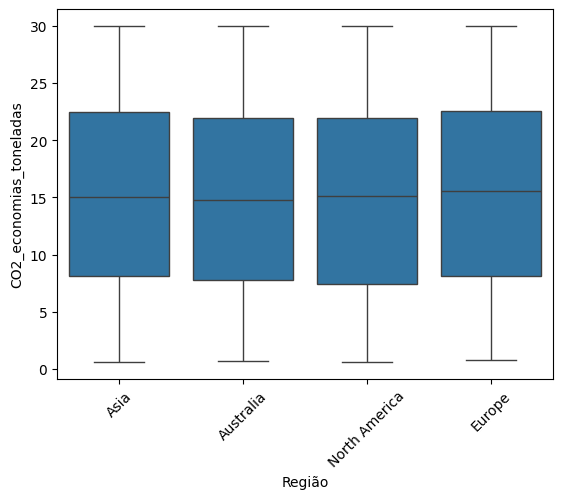

In [27]:
sns.boxplot(data=df_model, x="Região", y="CO2_economias_toneladas")
plt.xticks(rotation=45)
plt.show()


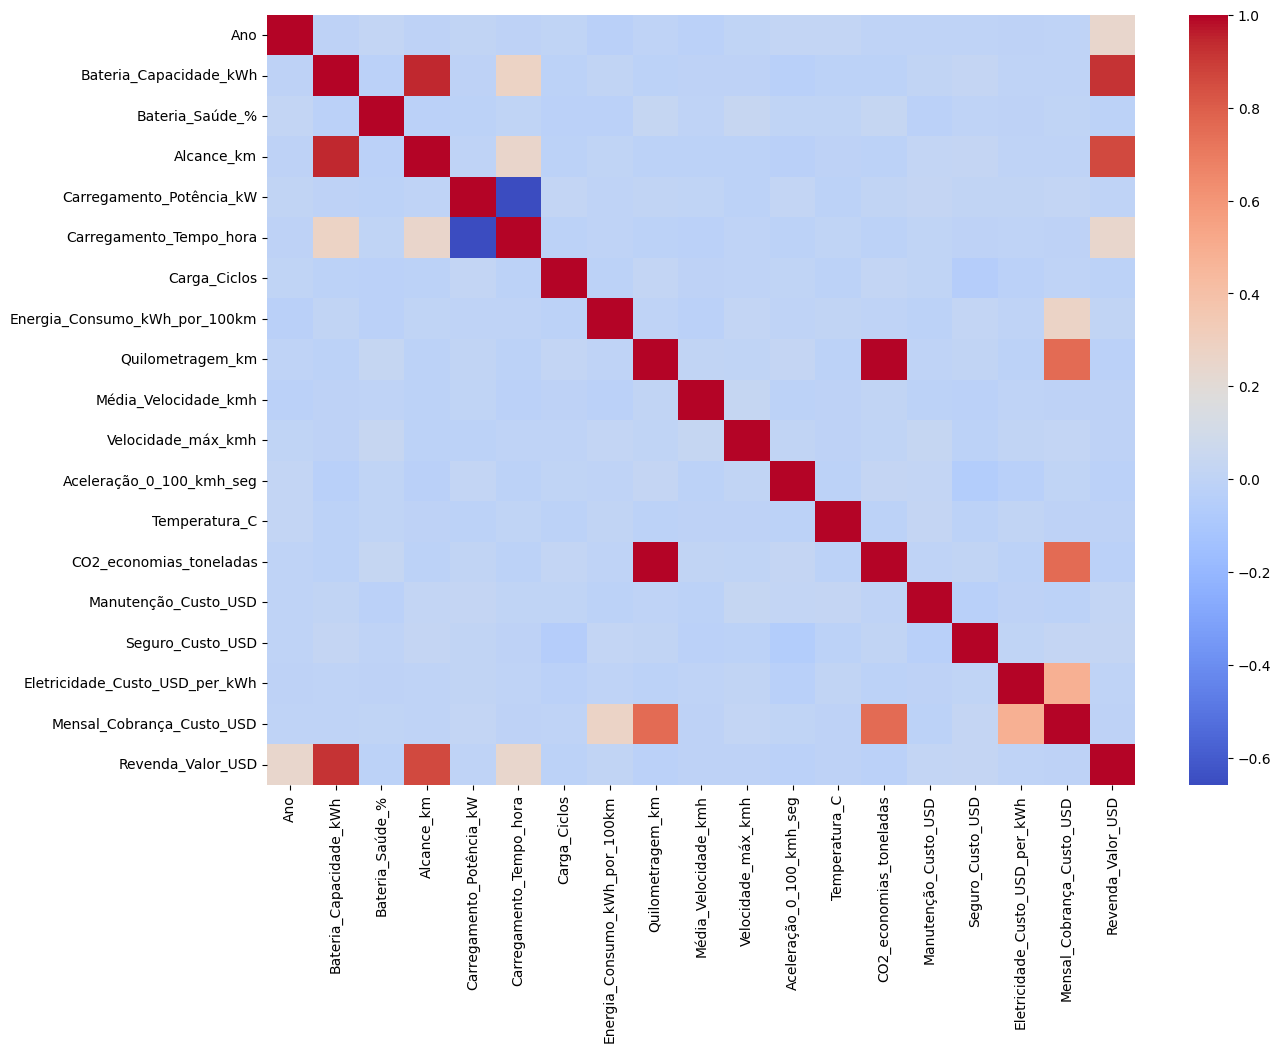

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(df_model.corr(numeric_only=True), cmap="coolwarm")
plt.show()


In [29]:
annual = df_model.groupby("Ano").agg({
    "Manutenção_Custo_USD":"mean",
    "CO2_economias_toneladas":"sum",
    "Revenda_Valor_USD":"mean"
}).reset_index()


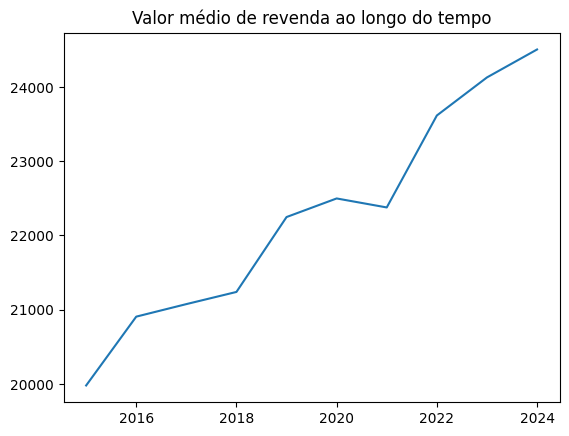

In [30]:
plt.plot(annual["Ano"], annual["Revenda_Valor_USD"])
plt.title("Valor médio de revenda ao longo do tempo")
plt.show()


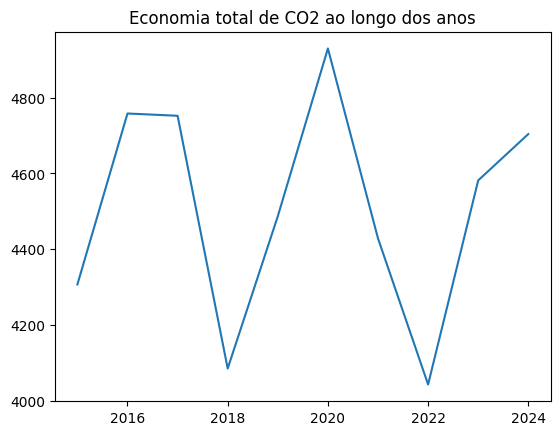

In [31]:
plt.plot(annual["Ano"], annual["CO2_economias_toneladas"])
plt.title("Economia total de CO2 ao longo dos anos")
plt.show()



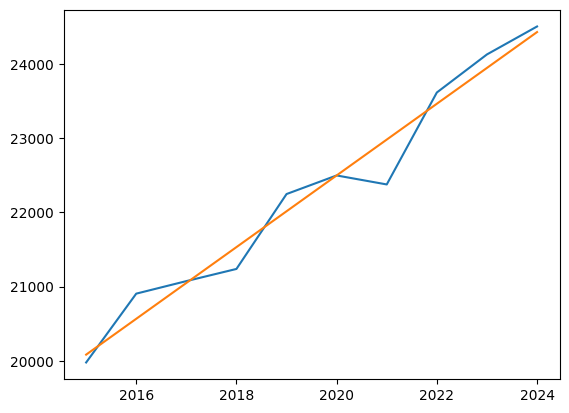

In [32]:
X = annual[["Ano"]]
y = annual["Revenda_Valor_USD"]

model_trend = LinearRegression()
model_trend.fit(X,y)

annual["Projecao"] = model_trend.predict(X)

plt.plot(annual["Ano"], annual["Revenda_Valor_USD"])
plt.plot(annual["Ano"], annual["Projecao"])
plt.show()


target = "Revenda_Valor_USD"

X = df_model.drop(columns=[target])
y = df_model[target]


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

modelo_linear = Pipeline([
    ("prep", preprocessor),
    ("model", LinearRegression())
])


In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_linear, X, y, cv=5, scoring='r2')

print(scores)
print(scores.mean())


[0.9067913  0.89722099 0.8932163  0.9014878  0.89315958]
0.8983751919648257


In [48]:
modelo_linear.fit(X, y)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
model = modelo_linear.named_steps["model"]

coeficientes = pd.Series(
    model.coef_,
    index=modelo_linear.named_steps["prep"].get_feature_names_out()
).sort_values(key=abs, ascending=False)

coeficientes.head(20)


num__Quilometragem_km             136242.510052
num__CO2_economias_toneladas     -136187.655716
num__Bateria_Capacidade_kWh         5274.156622
num__Ano                            1393.692078
cat__Modelo_Model S                  267.582898
cat__Modelo_i3                       202.957222
cat__Modelo_ID.4                    -155.552316
num__Alcance_km                     -152.283998
cat__Modelo_Model 3                 -149.332793
cat__Modelo_Q4 e-tron                145.180093
cat__Modelo_Model Y                 -141.534752
cat__Modelo_Leaf                    -141.523764
cat__Modelo_ID.3                     137.721855
cat__Tipo_veículo_Sedan             -134.708549
cat__Modelo_i4                      -131.764016
num__Mensal_Cobrança_Custo_USD      -127.828922
cat__Modelo_e-tron                  -124.487652
cat__Modelo_Niro EV                  118.812334
cat__Modelo_Ioniq 5                 -118.258176
cat__Modelo_Ariya                     97.892859
dtype: float64

## 📌 Conclusões 

<div style="
background:#1f1f1f;
color:#f0f0f0;
padding:20px;
border-radius:12px;
border-left:6px solid #3b82f6;
font-size:15px;
line-height:1.6;
">

A análise dos dados e a modelagem preditiva indicam que o valor de revenda de veículos elétricos é fortemente determinado por fatores técnicos e operacionais, especialmente bateria, nível de uso e atualização tecnológica.

<ul>
<li><b>Quilometragem_km</b> é o principal fator de desvalorização</li>
<li><b>Bateria_Capacidade_kWh</b> aumenta o valor percebido</li>
<li><b>Ano</b> influencia positivamente a retenção de valor</li>
<li><b>Modelo</b> reflete posicionamento e percepção de mercado</li>
</ul>

O modelo apresentou <b>R² médio ≈ 0.90</b>, indicando alta capacidade explicativa e estabilidade preditiva.

</div>


## 💼 Recomendações de negócio

<div style="
background:#1f1f1f;
color:#f0f0f0;
padding:20px;
border-radius:12px;
border-left:6px solid #22c55e;
font-size:15px;
line-height:1.6;
">

<b>Montadoras</b>
- investir em baterias mais duráveis
- comunicar autonomia como diferencial competitivo

<b>Seguradoras</b>
- incorporar métricas de uso e desgaste na precificação
- segmentar risco por perfil operacional

<b>Revendedores</b>
- priorizar veículos com menor quilometragem
- usar dados técnicos para justificar preço

<b>Frotas e mobilidade</b>
- monitorar saúde da bateria como ativo financeiro
- planejar substituição com base em depreciação operacional

</div>


---

## Considerações finais

Este projeto demonstra a aplicação de técnicas de análise exploratória, modelagem estatística e machine learning para resolução de um problema real de negócio: a previsão do valor de revenda de veículos elétricos.

Os resultados evidenciam a relevância de variáveis técnicas e operacionais na formação de preço e indicam oportunidades estratégicas para diferentes agentes do mercado.

Projeto desenvolvido como estudo aplicado em Data Science.

---
